# Supervised Learning – Linear Regression (Student Scores)
In this notebook, we:

- Use the **Student Scores** dataset (Hours studied → Exam score).
- Build a **very simple linear model**: \\(\hat{y} = w \cdot x\\) (no bias, no normalization).
- Try many different values of the weight \\(w\\) manually (no gradient descent).
- For each \\(w\\), compute the **Mean Squared Error (MSE)**.
- Find which \\(w\\) gives the lowest error.
- Plot:
  - The original data (Hours vs Scores)
  - The model prediction line
  - Error vs Weight curve

Goal: build intuition for how **model weights** affect **prediction error**.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Make plots a bit nicer
plt.rcParams["figure.figsize"] = (8, 5)

# Load the Student Scores dataset (Hours vs Scores)
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


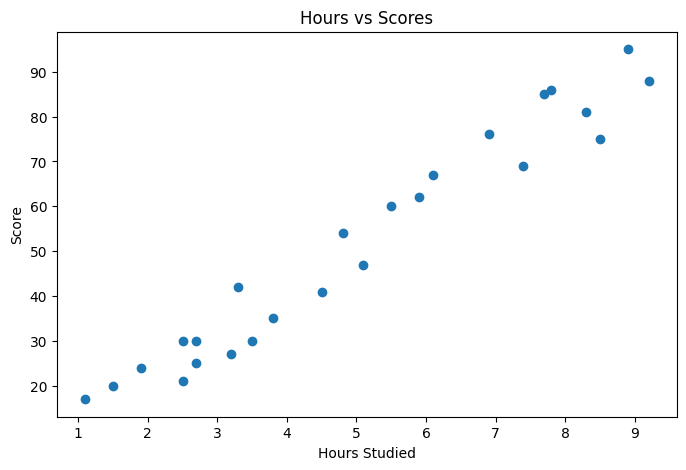

In [4]:
# Scatter plot of Hours vs Scores
plt.scatter(df["Hours"], df["Scores"])
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.title("Hours vs Scores")
plt.show()

In [5]:
X = df["Hours"].values.astype(float)
y = df["Scores"].values.astype(float)


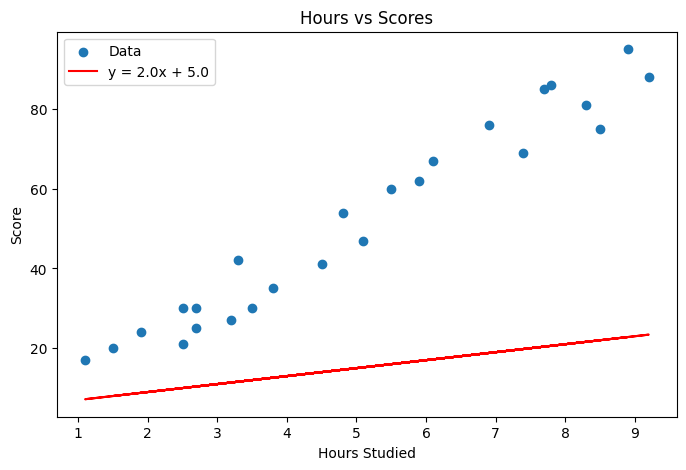

In [6]:
# Scatter plot
plt.scatter(df["Hours"], df["Scores"], label="Data")
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.title("Hours vs Scores")

# Line values
m = 2.0   # try changing this
b = 5.0   # try changing this
y_line = m * df["Hours"] + b   # use df["Hours"], not X

# Plot the line on top
plt.plot(df["Hours"], y_line, color="red", label=f"y = {m}x + {b}")

plt.legend()
plt.show()

In [7]:
df["y_pred"] = 2 * df["Hours"] + 5
df["error"] = df["Scores"] - df["y_pred"]
df.head()

,Hours,Scores,y_pred,error
0,2.5,21,10.0,11.0
1,5.1,47,15.2,31.8
2,3.2,27,11.4,15.6
3,8.5,75,22.0,53.0
4,3.5,30,12.0,18.0


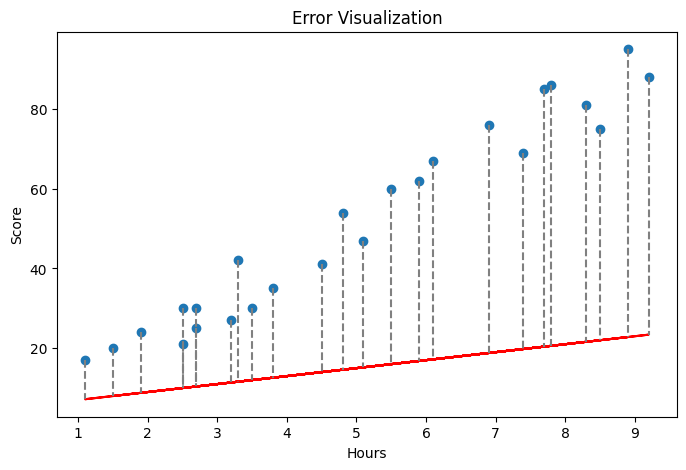

In [8]:
mse = np.mean(df["error"] ** 2)
rmse = np.sqrt(mse)
plt.scatter(df["Hours"], df["Scores"])
plt.plot(df["Hours"], df["y_pred"], color="red")

# Draw error lines
for x, y_true, y_pred in zip(df["Hours"], df["Scores"], df["y_pred"]):
    plt.plot([x, x], [y_true, y_pred], color="gray", linestyle="--")

plt.xlabel("Hours")
plt.ylabel("Score")
plt.title("Error Visualization")
plt.show()

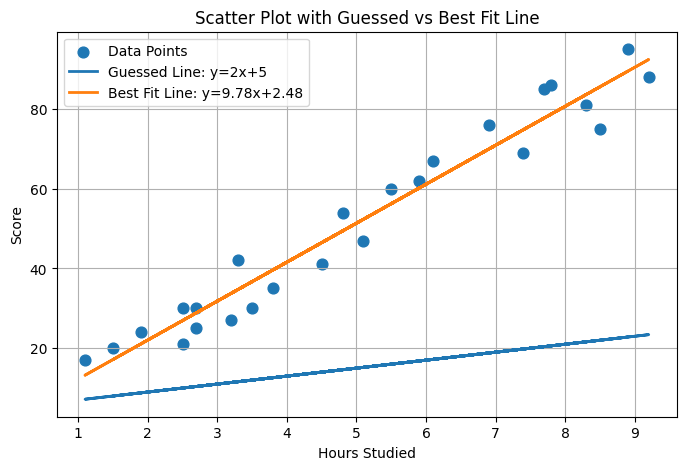

RMSE for guessed line (y = 2x + 5): 41.56946956601684
RMSE for best-fit regression line: 5.374265578592619


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# --- DATA ---
X = df[["Hours"]]     # 2D shape (n, 1)
y = df["Scores"]      # 1D shape (n,)

# ============================================================
# 1) GUESSED LINE (y = 2x + 5)
# ============================================================

m_guess = 2
b_guess = 5

y_pred_guess = m_guess * df["Hours"] + b_guess

rmse_guess = np.sqrt(np.mean((y - y_pred_guess)**2))


# ============================================================
# 2) BEST FIT LINE (Linear Regression)
# ============================================================

model = LinearRegression()
model.fit(X, y)

m_best = model.coef_[0]
b_best = model.intercept_

y_pred_best = model.predict(X)

rmse_best = np.sqrt(np.mean((y - y_pred_best)**2))


# ============================================================
# 3) PLOT EVERYTHING
# ============================================================

plt.figure(figsize=(8,5))
plt.scatter(df["Hours"], df["Scores"], label="Data Points", s=60)

# guessed line
plt.plot(df["Hours"], y_pred_guess, label=f"Guessed Line: y={m_guess}x+{b_guess}", linewidth=2)

# best-fit line
plt.plot(df["Hours"], y_pred_best, label=f"Best Fit Line: y={m_best:.2f}x+{b_best:.2f}", linewidth=2)

plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.title("Scatter Plot with Guessed vs Best Fit Line")
plt.legend()
plt.grid(True)
plt.show()

# ============================================================
# 4) PRINT RMSE VALUES
# ============================================================

print("RMSE for guessed line (y = 2x + 5):", rmse_guess)
print("RMSE for best-fit regression line:", rmse_best)